<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Laboratorio 1

Trabajo de Laboratorio 1 correspondiente al Módulo 1 "Análisis y Visualización de Datos".  

### GRUPO 13:
#### Mariano Martín Gualpa ( mgualpa@gmail.com )
#### Laercio Simoes ( laercio@hpcbrasil.com )

Dataset:"Comic Characters"

Ubicación: https://github.com/fivethirtyeight/data/tree/master/comic-characters

Archivos:
* README.md: Descripción de los campos.
* dc-wikia-data.csv: Dataset correspondiente a los personajes de comic de la editorial DC.
* marvel-wikia-data.csv: Dataset correspondiente a los personajes de comic de la editorial DC.



Carga de librerías:

In [2]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

Parámetros globales:

In [3]:
head_rows_to_show = 5
NO_AVAILABLE_LABEL = "NO AVAILABLE"
UNKNOWN_LABEL = "UNKNOWN"


# 1. Carga del Dataset

## 1.1 Carga

Carga del dataset dc-wikia-data.csv correspondiente a la editorial DC Comics. Se presentan a continuación los primeros registros del datasets.

Se cargan ambos datasets por separado y se concatenan en uno mismo al que se le agrega un nuevo campo llamado editorial.

### 1.1.1 Carga del dataset dc-wikia-data.csv correspondiente a los personajes de DC Comics.

In [4]:
dcDataset = pandas.read_csv('comic-characters/dc-wikia-data.csv',
                          encoding='utf8')
dcRowsCountDataset = dcDataset.shape[0]
dcColsCountDataset = dcDataset.shape[1]
print("Registros: {}     Atributos: {}".format(dcRowsCountDataset, dcColsCountDataset))

dcDataset[:head_rows_to_show]

Registros: 6896     Atributos: 13


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


### 1.1.2 Carga del dataset marvel-wikia-data.csv correspondiente a los personajes de Marvel.

In [5]:
marvelDataset = pandas.read_csv('comic-characters/marvel-wikia-data.csv',
                          encoding='utf8')
marvelRowsCountDataset = marvelDataset.shape[0]
marvelColsCountDataset = marvelDataset.shape[1]
print("Registros: {}     Atributos: {}".format(marvelRowsCountDataset, marvelColsCountDataset))

marvelDataset[:head_rows_to_show]

Registros: 16376     Atributos: 13


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## 1.2 Merge de ambos datasets en uno consolidado. 
Primero se debe agregar el atributo "publisher" a cada dataset y pasar a mayusculas los nombres de los atributos.

In [6]:
dcDataset.columns = dcDataset.columns.str.upper()
marvelDataset.columns = marvelDataset.columns.str.upper()
dcDataset["PUBLISHER"] = "DC Comics"
marvelDataset["PUBLISHER"] = "Marvel"

A continuación concatenamos ambos dataframes en uno.

In [7]:
comicsDF = pandas.concat([dcDataset, marvelDataset])
rowsCountComicsDF, colsCountComicsDF = comicsDF.shape

print("Registros: {}     Reg. DC + Marvel: {}       Atributos: {} ".format(rowsCountComicsDF, dcRowsCountDataset + marvelRowsCountDataset, colsCountComicsDF))
comicsDF[:head_rows_to_show]

Registros: 23272     Reg. DC + Marvel: 23272       Atributos: 14 


,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,PUBLISHER
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC Comics
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC Comics
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC Comics
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC Comics
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC Comics


# 2. Limpieza del Dataset. 

Se contabilizan por cada columna la cantidad de casos NaN. 

In [8]:
def printNaNCount(dataframe):
    print("Cantidad de NaN por columna:\n----------------------------")
    for col in dataframe.columns:
        print("{}: {}".format(col, sum(pandas.isnull(dataframe[col]))))


printNaNCount(comicsDF)


Cantidad de NaN por columna:
----------------------------
PAGE_ID: 0
NAME: 0
URLSLUG: 0
ID: 5783
ALIGN: 3413
EYE: 13395
HAIR: 6538
SEX: 979
GSM: 23118
ALIVE: 6
APPEARANCES: 1451
FIRST APPEARANCE: 884
YEAR: 884
PUBLISHER: 0


Puede consultarse la tabla para observarse los casos:

In [9]:
comicsDF[comicsDF['APPEARANCES'].isnull()]

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,PUBLISHER
6541,306472,Matteo Bischoff (New Earth),\/wiki\/Matteo_Bischoff_(New_Earth),Secret Identity,Bad Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,NaN,"2012, May",2012.0,DC Comics
6542,273317,Doomslayer (New Earth),\/wiki\/Doomslayer_(New_Earth),Secret Identity,Bad Characters,Green Eyes,White Hair,Male Characters,NaN,Living Characters,NaN,"2011, July",2011.0,DC Comics
6543,242097,Emily Sung (New Earth),\/wiki\/Emily_Sung_(New_Earth),Secret Identity,Good Characters,Violet Eyes,Purple Hair,Female Characters,NaN,Living Characters,NaN,"2011, July",2011.0,DC Comics
6544,247494,Ry'jll (New Earth),\/wiki\/Ry%27jll_(New_Earth),Secret Identity,Good Characters,Green Eyes,NaN,Female Characters,NaN,Living Characters,NaN,"2011, October",2011.0,DC Comics
6545,161599,Baron Gestapo (New Earth),\/wiki\/Baron_Gestapo_(New_Earth),NaN,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, March",2010.0,DC Comics
6546,183059,Barro Cruzz (New Earth),\/wiki\/Barro_Cruzz_(New_Earth),NaN,NaN,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, November",2010.0,DC Comics
6547,202295,Barry Quinzel (New Earth),\/wiki\/Barry_Quinzel_(New_Earth),Public Identity,NaN,NaN,Black Hair,Male Characters,NaN,Living Characters,NaN,"2010, February",2010.0,DC Comics
6548,228571,Dragonfly II (New Earth),\/wiki\/Dragonfly_II_(New_Earth),Secret Identity,Bad Characters,NaN,Black Hair,Female Characters,NaN,Living Characters,NaN,"2010, May",2010.0,DC Comics
6549,179905,Altin Ad'Ms (New Earth),\/wiki\/Altin_Ad%27Ms_(New_Earth),Public Identity,Good Characters,White Eyes,NaN,Male Characters,NaN,Living Characters,NaN,"2010, July",2010.0,DC Comics
6550,192422,D'Kay D'Razz (New Earth),\/wiki\/D%27Kay_D%27Razz_(New_Earth),Secret Identity,Bad Characters,Red Eyes,NaN,Female Characters,NaN,Deceased Characters,NaN,"2010, July",2010.0,DC Comics


Se agrega la columna IS_GSM correspondiente a un atributo lógico "el personaje pertenece a una minoría de género o sexual", que se utilizará junto con el atributo GSM ya incluido en los datasets originales (que indica la minoría o NaN si no pertenece). Además, se comparan los dominios de cada atributo en los dos datasets originales.

In [10]:
# Imprimir dominios
for col in ("ALIGN","ID", "EYE", "HAIR", "SEX", "GSM", "ALIVE"):
    print("-------------\nATRIBUTE: {}\n-------------\nDC: {} \nMarvel:{}".format(col, dcDataset[col].unique(), marvelDataset[col].unique()))

-------------
ATRIBUTE: ALIGN
-------------
DC: ['Good Characters' 'Bad Characters' 'Neutral Characters' nan
 'Reformed Criminals'] 
Marvel:['Good Characters' 'Neutral Characters' 'Bad Characters' nan]
-------------
ATRIBUTE: ID
-------------
DC: ['Secret Identity' 'Public Identity' nan 'Identity Unknown'] 
Marvel:['Secret Identity' 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' nan]
-------------
ATRIBUTE: EYE
-------------
DC: ['Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Purple Eyes' 'Black Eyes'
 'White Eyes' 'Red Eyes' 'Photocellular Eyes' 'Hazel Eyes' 'Amber Eyes'
 'Yellow Eyes' nan 'Grey Eyes' 'Pink Eyes' 'Violet Eyes' 'Gold Eyes'
 'Orange Eyes' 'Auburn Hair'] 
Marvel:['Hazel Eyes' 'Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Grey Eyes'
 'Yellow Eyes' 'Gold Eyes' 'Red Eyes' 'Black Eyeballs' 'Amber Eyes'
 'Variable Eyes' nan 'Black Eyes' 'White Eyes' 'Orange Eyes' 'Silver Eyes'
 'Purple Eyes' 'Pink Eyes' 'One Eye' 'Violet Eyes' 'Multiple Eyes'
 'Magenta Eyes' 'Yellow E

A partir del análisis de los datos, cantidad de NaN por columna, valores en los dominios, ser plantean las siguientes modificaciones en los datos:
* En los campos ALIGN, EYE, HAIR, SEX y ALIVE, los NaN se reemplazarán por una etiqueta única contenida en la constante UNKNOWN_LABEL. De esta manera, se tratan a todos los casos NaN de esos campos como un valor etiquedato como "Desconocido" (sin poder especificar si es porque no fue cargado o porque no le corresponde un valor).
* Se crea el campo lógico "IS_GSM" que corresponde a Verdadero si tiene asignado un valor en el campo GSM (que en los casos que aplica, indica el tipo de minoría de género o sexual a la que corresponde). Indica Falso si GSM contenía un NaN.
* Se crea el campo "GENDER", con la siguiente lógica: Si corresponde a minoría de genero o sexual indica cual, sino, indica el valor del campo "SEX". Este campo permite consolidar los campos SEX y GSM.
* Se unifica el dominio en el campo SEX, pues DC y Marvel tienen etiquetas diferentes ("Agender" y "Genderless" respectivamente) que se refieren al mismo valor.  
* Se eliminan los registros donde "APPEAREANCES" y/o "YEAR" tienen valor NaN.

In [11]:
comicsDF['ALIGN'] = comicsDF['ALIGN'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['EYE'] = comicsDF['EYE'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['HAIR'] = comicsDF['HAIR'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['SEX'] = comicsDF['SEX'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['SEX'] = comicsDF['SEX'].replace("Agender Characters", "Genderless Characters") #Marvel usa "Agender" que es sinonimo de "Genderless" en DC
comicsDF['IS_GSM'] = ~ comicsDF['GSM'].isnull() # En GSM se dejan los NaN pero se agrega otra columna IS_GSM 
comicsDF["GENDER"] = comicsDF.apply(lambda row: row['GSM'] if row['IS_GSM'] else row['SEX'], axis = 1) # Agrega campo "GENDER"
comicsDF['ALIVE'] = comicsDF['ALIVE'].replace(numpy.nan, UNKNOWN_LABEL)

# Imprimir cuenta de valores NaN por columna
printNaNCount(comicsDF)

Cantidad de NaN por columna:
----------------------------
PAGE_ID: 0
NAME: 0
URLSLUG: 0
ID: 5783
ALIGN: 0
EYE: 0
HAIR: 0
SEX: 0
GSM: 23118
ALIVE: 0
APPEARANCES: 1451
FIRST APPEARANCE: 884
YEAR: 884
PUBLISHER: 0
IS_GSM: 0
GENDER: 0


Se verifica que existen valores faltantes para el atributo "APPEAREANCES" (cantidad de apariciones) y "YEAR" (año de primera publicación). Tras analizar en detalle los casos, se decide eliminar los registros correspondientes. 


In [12]:
countNaNAppearences = len(comicsDF[comicsDF["APPEARANCES"].isnull()])
countNaNYear = len(comicsDF[comicsDF["YEAR"].isnull()])

countBeforeCleanRows = len(comicsDF)
comicsDF = comicsDF.dropna(subset=['APPEARANCES', 'YEAR'])
countRows = len(comicsDF)
deletedRows = countBeforeCleanRows - countRows
print("Cantidad de registros con NaN en:  APPERANCES = {}   YEAR = {} ".format(countNaNAppearences, countNaNYear))
print("Cantidad antes de eliminar APPEAREANCES = NaN: ", countBeforeCleanRows)
print("Cantidad despues de eliminar APPEAREANCES = NaN: ", countRows)
print("Cantidad de registros eliminados: ", deletedRows)


Cantidad de registros con NaN en:  APPERANCES = 1451   YEAR = 884 
Cantidad antes de eliminar APPEAREANCES = NaN:  23272
Cantidad despues de eliminar APPEAREANCES = NaN:  21146
Cantidad de registros eliminados:  2126


In [13]:
## Operaciones Interesantes de Consulta sobre DataFrames.
#comicsDF[comicsDF['NAME'].str.contains("Batman")] # Mostrar todos los Batman
#comicsDF.NAME.str.extract('(.*?)\(', expand=True)[0].value_counts() # Recuperar la cantidad de veces que se repite el nombre


# 3. Análisis y Visualización de los Datos
## 3.1. Estadísticas Descriptivas

Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿

Responden a alguna distribución conocida?
Realizar un análisis de outliers.

Explicar cómo varían las métricas cuando desglosamos por género. 

¿Responden a alguna distribución conocida? 

Comparar cualitativamente y gráficamente ambas distribuciones. 

Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.




In [20]:
comicsDF["APPEARANCES"].describe()

count    21146.000000
mean        19.328336
std         94.439958
min          1.000000
25%          1.000000
50%          4.000000
75%         10.000000
max       4043.000000
Name: APPEARANCES, dtype: float64

In [21]:

comicsDF["APPEARANCES"].mode()


0    1.0
dtype: float64

In [18]:
comicsDF["YEAR"].describe()

count    21146.000000
mean      1986.223494
std         19.123387
min       1935.000000
25%       1976.000000
50%       1990.000000
75%       2001.000000
max       2013.000000
Name: YEAR, dtype: float64

In [26]:
comicsDF.groupby(['ALIGN'])['APPEARANCES'].count()

ALIGN
Bad Characters        8827
Good Characters       6783
Neutral Characters    2516
Reformed Criminals       3
UNKNOWN               3017
Name: APPEARANCES, dtype: int64

In [25]:
comicsDF.groupby(['SEX'])['APPEARANCES'].count()
    

SEX
Female Characters          5302
Genderfluid Characters        2
Genderless Characters        52
Male Characters           14965
Transgender Characters        1
UNKNOWN                     824
Name: APPEARANCES, dtype: int64

In [27]:
comicsDF.groupby(['GENDER', 'GSM'])['APPEARANCES'].count()

GENDER                  GSM                   
Bisexual Characters     Bisexual Characters        29
Genderfluid Characters  Genderfluid Characters      1
Homosexual Characters   Homosexual Characters     111
Pansexual Characters    Pansexual Characters        1
Transgender Characters  Transgender Characters      2
Transvestites           Transvestites               1
Name: APPEARANCES, dtype: int64

In [28]:
comicsDF.groupby(['GENDER', 'ALIVE'])['APPEARANCES'].count()

GENDER                  ALIVE              
Bisexual Characters     Deceased Characters        4
                        Living Characters         25
Female Characters       Deceased Characters     1065
                        Living Characters       4173
                        UNKNOWN                    1
Genderfluid Characters  Living Characters          1
Genderless Characters   Deceased Characters       11
                        Living Characters         40
Homosexual Characters   Deceased Characters       22
                        Living Characters         88
                        UNKNOWN                    1
Male Characters         Deceased Characters     3849
                        Living Characters      11037
Pansexual Characters    Living Characters          1
Transgender Characters  Deceased Characters        1
                        Living Characters          2
Transvestites           Living Characters          1
UNKNOWN                 Deceased Characters      142
  

In [29]:
comicsDF['IS_DCCOMICS'] = (comicsDF['PUBLISHER'] == "DC Comics")
comicsDF['IS_MARVEL'] = (comicsDF['PUBLISHER'] == "Marvel")

byYearDF = comicsDF.groupby('YEAR').sum()
byYearDF.corr()

,PAGE_ID,APPEARANCES,IS_GSM,IS_DCCOMICS,IS_MARVEL
PAGE_ID,1.000000,-0.010882,0.555785,0.738480,0.858621
APPEARANCES,-0.010882,1.000000,0.029342,0.135186,0.249085
IS_GSM,0.555785,0.029342,1.000000,0.624317,0.549667
IS_DCCOMICS,0.738480,0.135186,0.624317,1.000000,0.741466
IS_MARVEL,0.858621,0.249085,0.549667,0.741466,1.000000


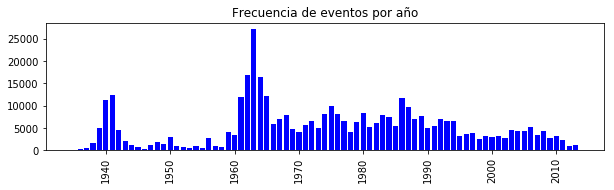

In [31]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

def plot_chart(x, y, title, show_line=True):
    plt.figure(figsize=(10,8))
    plt.subplot(313)
    plt.bar(x, y, color="blue")
    plt.xticks(rotation=90)
    if (show_line):
        plt.plot(x, y, color="red", linestyle='--')
    plt.title(title)

eventCountsByYear = comicsDF.groupby('YEAR')['APPEARANCES'].sum()
x = eventCountsByYear.index
plot_chart(x, eventCountsByYear.values, "Frecuencia de eventos por año", show_line=False)